In [332]:
from IPython.display import Image
import random
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import wget

# Prediction Statistics

In [315]:
with open('../predictions/prediction.json') as fd:
   predictions = json.load(fd)

In [341]:
predictions

[{'predicted_img_id': 143961,
  'bison_id': 0,
  'high_similarity': 0.27477791905403137,
  'low_similarity': 0.19385801255702972},
 {'predicted_img_id': 369373,
  'bison_id': 1,
  'high_similarity': 0.3444063067436218,
  'low_similarity': 0.3129858374595642},
 {'predicted_img_id': 252147,
  'bison_id': 2,
  'high_similarity': 0.28453752398490906,
  'low_similarity': 0.2067510336637497},
 {'predicted_img_id': 172616,
  'bison_id': 3,
  'high_similarity': 0.3112862706184387,
  'low_similarity': 0.267723023891449},
 {'predicted_img_id': 111448,
  'bison_id': 4,
  'high_similarity': 0.3063912093639374,
  'low_similarity': 0.30179792642593384},
 {'predicted_img_id': 190595,
  'bison_id': 5,
  'high_similarity': 0.3265667259693146,
  'low_similarity': 0.2746151387691498},
 {'predicted_img_id': 361245,
  'bison_id': 6,
  'high_similarity': 0.32088547945022583,
  'low_similarity': 0.30965813994407654},
 {'predicted_img_id': 76896,
  'bison_id': 7,
  'high_similarity': 0.33057108521461487,
  'l

In [316]:
def plot_high_similarity(data, title, xlabel, ylabel):
    # Extract high similarity values
    high_similarity_values = [item['high_similarity'] for item in data]
    # Calculate mean and standard deviation
    mean_value = np.mean(high_similarity_values)
    std_dev_value = np.std(high_similarity_values)
    print(f'Mean: {mean_value} and SD: {std_dev_value}')
    # Create histogram with Seaborn
    sns.distplot(high_similarity_values, kde=False)
    # Plot mean and standard deviation lines
    plt.axvline(x=mean_value, color='r', linestyle='--', label='Mean: {:.2f}'.format(mean_value))
    plt.axvline(x=mean_value+std_dev_value, color='g', linestyle='--', label='Mean + SD: {:.2f}'.format(mean_value+std_dev_value))
    plt.axvline(x=mean_value-std_dev_value, color='g', linestyle='--', label='Mean - SD: {:.2f}'.format(mean_value-std_dev_value))

    # Set title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Display plot
    plt.legend()
    plt.show()

Mean: 0.3175863163414268 and SD: 0.029989699516373987


/var/folders/vq/w5yn9mmj69d2bh0ndyqj8t3m0000gn/T/ipykernel_5506/4242669185.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(high_similarity_values, kde=False)


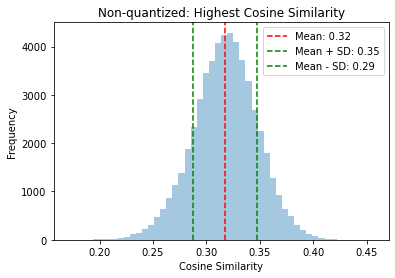

In [327]:
plot_high_similarity (
    data= predictions,
    title='Non-quantized: Highest Cosine Similarity',
    xlabel="Cosine Similarity",
    ylabel= "Frequency"
)

In [318]:
def extract_discriminated_similarities (data):
    high_similarity = [s_h['high_similarity'] for s_h in data]
    low_similarity = [s_l['low_similarity']for s_l in data]
    np_high_similarity_values = np.array(high_similarity)
    np_low_similarity_values = np.array(low_similarity)
    similarity_difference = np_high_similarity_values - np_low_similarity_values

    return similarity_difference


def plot_similarity_difference(similarity_difference,
                               title,
                               xlabel):

    # Calculate mean and standard deviation
    mean_value = np.mean(similarity_difference)
    std_dev_value = np.std(similarity_difference)
    print(f'Mean: {mean_value} and SD: {std_dev_value}')
    # Create histogram with Seaborn
    sns.histplot(data=similarity_difference, kde=False, bins=20)
    # Plot mean and standard deviation lines
    plt.axvline(x=mean_value, color='r', linestyle='--', label='Mean: {:.2f}'.format(mean_value))
    plt.axvline(x=mean_value+std_dev_value, color='g', linestyle='--', label='Mean + SD: {:.2f}'.format(mean_value+std_dev_value))
    plt.axvline(x=mean_value-std_dev_value, color='g', linestyle='--', label='Mean - SD: {:.2f}'.format(mean_value-std_dev_value))

    # Set title and labels
    plt.title(title)
    plt.xlabel(xlabel)


    # Display plot
    plt.legend()
    plt.show()

Mean: 0.04555791293768554 and SD: 0.03768846583006807


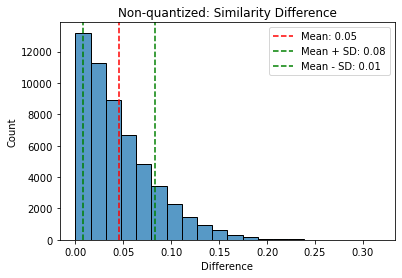

In [328]:
# Plot of similarity differences across correct and wrong predictions non-quantized model
plot_similarity_difference(
    similarity_difference =  extract_discriminated_similarities(predictions),
    title= 'Non-quantized: Similarity Difference',
    xlabel= 'Difference',
)

## Analysis of correct and wrong predictions separetely

In [320]:
with open('../predictions/correct_predictions.json') as fd:
   correct_predictions = json.load(fd)

with open('../predictions/wrong_predictions.json') as fd:
    wrong_predictions = json.load(fd)

In [322]:
print(f'Number of correct predictions: {len(correct_predictions)}. Number of wrong predictions: {len(wrong_predictions)}.Total number of predictions: {len(correct_predictions)+len(wrong_predictions)}')

Number of correct predictions: 44560. Number of wrong predictions: 9693.Total number of predictions: 54253


### Correct predictions

Mean: 0.31902268019670377 and SD: 0.030199240459746226


/var/folders/vq/w5yn9mmj69d2bh0ndyqj8t3m0000gn/T/ipykernel_5506/4242669185.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(high_similarity_values, kde=False)


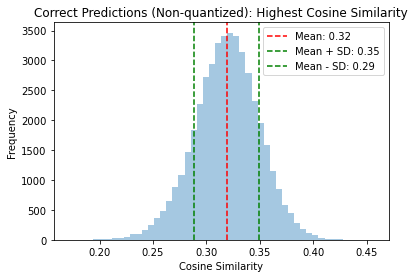

In [329]:
plot_high_similarity (
    data= correct_predictions,
    title='Correct Predictions (Non-quantized): Highest Cosine Similarity',
    xlabel="Cosine Similarity",
    ylabel= "Frequency"
)

### Wrong predictions

Mean: 0.3109831621692263 and SD: 0.028076977305919033


/var/folders/vq/w5yn9mmj69d2bh0ndyqj8t3m0000gn/T/ipykernel_5506/4242669185.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(high_similarity_values, kde=False)


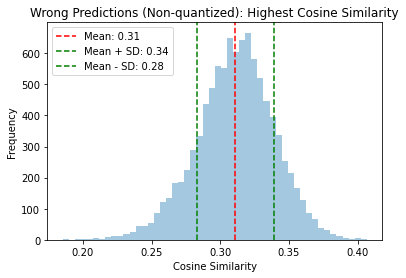

In [330]:
plot_high_similarity (
    data= wrong_predictions,
    title='Wrong Predictions (Non-quantized): Highest Cosine Similarity',
    xlabel="Cosine Similarity",
    ylabel= "Frequency"
)

Mean: 0.018021612956675658 and SD: 0.01607334767070974


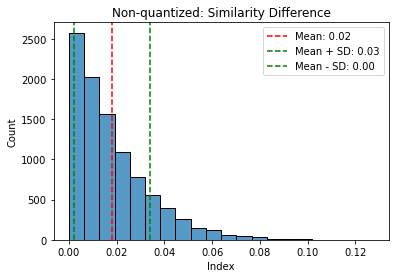

In [331]:
plot_similarity_difference(
    similarity_difference =  extract_discriminated_similarities(wrong_predictions),
    title= 'Non-quantized: Similarity Difference',
    xlabel= 'Index',

)